In [1]:
from recipe_rec.recipe2vec import Recipe2Vec
from recipe_rec.simple_search import SimpleSearch
from recipe_rec.sbert_embeddings import SBERTRecommender
from recipe_rec.feature_generation import FeatureGenerationRecommender
from recipe_rec.test_framework import generate_test_data

In [2]:
systems = {}

num_epochs = 300

# for pair in zip(alphas, epochs):
systems["recipe2vec"] = Recipe2Vec(
    # model_path="./recipe_rec/data/recipe2vec_42d574c155524a28a8ae6ee691d96e85.model",
    num_epochs=num_epochs,
    # index_path="./recipe_rec/data/recipe2vec_7153b2f49949474495fd9ffe8b340baf.ann",
    verbose=True,
)

INFO - 15:26:07: Loading pre-trained model.
INFO - 15:26:07: loading Word2Vec object from ./recipe_rec/data/recipe2vec_42d574c155524a28a8ae6ee691d96e85.model
INFO - 15:26:07: loading wv recursively from ./recipe_rec/data/recipe2vec_42d574c155524a28a8ae6ee691d96e85.model.wv.* with mmap=None
INFO - 15:26:07: setting ignored attribute cum_table to None
INFO - 15:26:07: Word2Vec lifecycle event {'fname': './recipe_rec/data/recipe2vec_42d574c155524a28a8ae6ee691d96e85.model', 'datetime': '2023-04-22T15:26:07.533986', 'gensim': '4.3.1', 'python': '3.8.3 (default, Jul  2 2020, 16:21:59) \n[GCC 7.3.0]', 'platform': 'Linux-5.15.0-69-generic-x86_64-with-glibc2.10', 'event': 'loaded'}
INFO - 15:26:07: Loaded pre-trained model.
INFO - 15:26:07: Building an index for the recipes using trained model.
INFO - 15:26:30: Built Annoy index and saved to None


In [3]:
systems["recipe2vec"].build_ingredient_index(10, "recipe2vec_ingredient.ann")

In [7]:
systems["recipe2vec"].get_recommendations(
    recipe=["butter", "flour", "milk"], n_recommendations=10, get_recipes=False
)

['butter',
 'flour',
 'milk',
 'margarine',
 'all-purpose flour',
 'white enriched flour',
 'light demerara sugar',
 'Most Incredible No Fail Pie Crust',
 'Homemade Pie Crust',
 'evaporated milk']

In [3]:
systems["recipe2vec"].training_losses

total_loss = 0
true_losses = []

for loss in systems["recipe2vec"].training_losses:
    loss -= total_loss
    total_loss += loss
    true_losses.append(loss)

AttributeError: 'Recipe2Vec' object has no attribute 'training_losses'

In [6]:
min(true_losses)

168816.0

In [2]:
true_losses_old = [
    7707911.0,
    6264662.0,
    5666833.0,
    5154558.0,
    5214564.0,
    4458104.0,
    2857076.0,
    2872588.0,
    2814304.0,
    2785072.0,
    2790948.0,
    2792728.0,
    2773616.0,
    2763424.0,
    2740952.0,
    2713932.0,
    2717860.0,
    2062844.0,
    171560.0,
    173536.0,
    170752.0,
    173624.0,
    172152.0,
    172800.0,
    173512.0,
    173744.0,
    171168.0,
    172176.0,
    171768.0,
    169000.0,
]

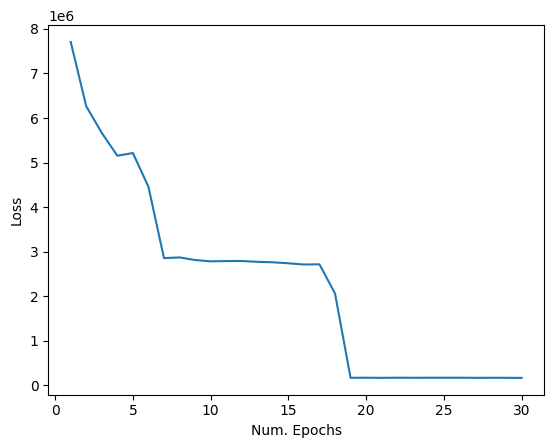

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.lineplot(x=[i for i in range(1, num_epochs + 1)], y=true_losses)

ax.set(xlabel="Num. Epochs", ylabel=" Training Loss")

plt.show()

In [3]:
systems = {}

systems["simple_search"] = SimpleSearch()

In [4]:
systems["simple_search"].build_time

86634

In [5]:
systems["recipe2vec"].build_time

162094753

In [16]:
systems["feature_generation"] = FeatureGenerationRecommender(
    embeddings_path="./recipe_rec/data/sbert_ingredient_vectors.pkl",
    # classifiers_path="./recipe_rec/data/trained_classifiers_afe03ef0ef4c4783bfc33d0f1e571a5e.pkl",
    labelled_dataset_path="./recipe_rec/data/labelled_dataset_466bf05a687343beb2647be876f6492b.csv",
    index_path="./recipe_rec/data/feature_generation_f8b893315c194c1488c6020ec099a640.ann",
    verbose=False,
)

INFO - 11:29:32: Load pretrained SentenceTransformer: all-MiniLM-L12-v2
INFO - 11:29:33: Use pytorch device: cpu


Batches:   0%|          | 0/10 [00:00<?, ?it/s]

In [22]:
from IPython.display import HTML

display(HTML(systems["feature_generation"].training_metrics.to_html(index=False)))

col_name,accuracy,f1,precision,recall
Savoury,0.644444,0.466667,0.700000,0.350
Rough,0.611111,0.406780,0.631579,0.300
Hot,0.622222,0.468750,0.625000,0.375
Spicy,0.633333,0.459016,0.666667,0.350
Acidic,0.611111,0.406780,0.631579,0.300
Crunchy,0.622222,0.413793,0.666667,0.300
Creamy,0.644444,0.448276,0.722222,0.325
Sticky,0.600000,0.400000,0.600000,0.300
Liquid,0.622222,0.484848,0.615385,0.400
Aromatic,0.666667,0.545455,0.692308,0.450


In [7]:
systems["sbert"] = SBERTRecommender(
    embeddings_path="./recipe_rec/data/sbert_ingredient_vectors.pkl",
    index_path="./recipe_rec/data/sbert_889c6acca58647418f0df944f261b972.ann",
    verbose=False,
)

INFO - 11:08:01: Load pretrained SentenceTransformer: all-MiniLM-L12-v2
INFO - 11:08:02: Use pytorch device: cpu


In [8]:
# systems["feature_generation"].metrics

In [9]:
eval_data = generate_test_data(rec_systems=systems, n_recipes=25, n_recommendations=10)

# out_path: str = "evaluation_data.csv"
# eval_data.to_csv(out_path)

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

In [13]:
for system in systems:
    print(
        f"""
System: {system}
    Build time: {systems[system].build_time}
    Avg. Recommendation Time: {systems[system].rec_times["avg"]}
    """
    )


System: simple_search
    Build time: 1104594
    Avg. Recommendation Time: 883746226.76
    

System: recipe2vec
    Build time: 162094753
    Avg. Recommendation Time: 18103220.12
    

System: feature_generation
    Build time: 2676159830
    Avg. Recommendation Time: 329411677.08
    

System: sbert
    Build time: 1057733012
    Avg. Recommendation Time: 112950017.24
    
